In [1]:
# %pip install seaborn --upgrade
# %pip install matplotlib --upgrade
# %pip install pandas --upgrade
# %pip install numpy --upgrade
# %pip install scikit-learn --upgrade
# %pip install scipy --upgrade
# %pip install tensorflow==2.15
# 
# %pip install keras=
# import tensorflow as tf
# import keras

# print("keras version:", keras.__version__)
# print("TensorFlow version:", tf.__version__)
# %pip freeze > requirements.txt




In [2]:
#plot error matrix
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
def test_model(modelname, address):
    model= tf.keras.models.load_model(modelname)
    
    input_shape = (300, 300, 3)
    val_datagen = ImageDataGenerator(rescale=1./255)
    val_generator = val_datagen.flow_from_directory(
        address,
        target_size=input_shape[:2],
        batch_size=1,
        class_mode='categorical',
        shuffle=False
        )
    #heatmap
    y_true = val_generator.classes
    y_pred = model.predict(val_generator)
    y_pred = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion Matrix '+modelname)
#     plt.savefig('confusion_matrix '+modelname+'.png')
    plt.show()
    #độ chính xác
    from sklearn.metrics import classification_report
    print(classification_report(y_true, y_pred, target_names=val_generator.class_indices.keys()))





Found 25952 images belonging to 10 classes.
25952/25952 [==============================] - 5417s 209ms/step


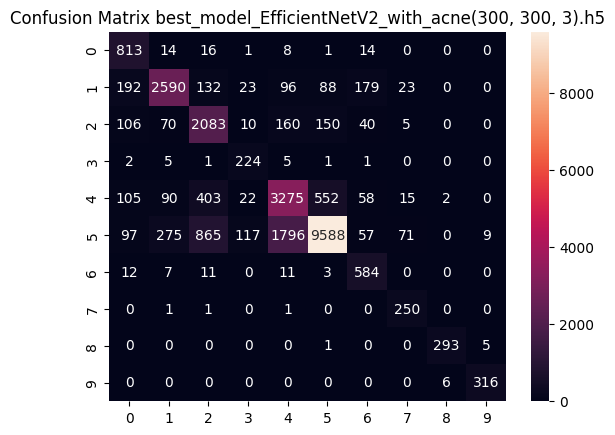

              precision    recall  f1-score   support

          AK       0.61      0.94      0.74       867
         BCC       0.85      0.78      0.81      3323
         BKL       0.59      0.79      0.68      2624
          DF       0.56      0.94      0.70       239
         MEL       0.61      0.72      0.66      4522
          NV       0.92      0.74      0.82     12875
         SCC       0.63      0.93      0.75       628
        VASC       0.69      0.99      0.81       253
        ance       0.97      0.98      0.98       299
      eczema       0.96      0.98      0.97       322

    accuracy                           0.77     25952
   macro avg       0.74      0.88      0.79     25952
weighted avg       0.80      0.77      0.78     25952



In [3]:
test_model('best_model_EfficientNetV2_with_acne(300, 300, 3).h5', 'Data')